In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import math
from sklearn.svm import SVR
from sklearn import svm
import seaborn as sns
from statistics import mean
from math import sqrt
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("letter-recognition.csv")

In [4]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
data["letter"].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [6]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

<Axes: xlabel='letter', ylabel='count'>

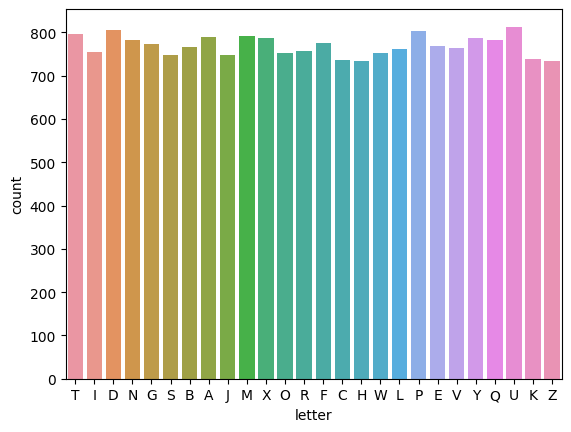

In [7]:
sns.countplot(x="letter", data=data)

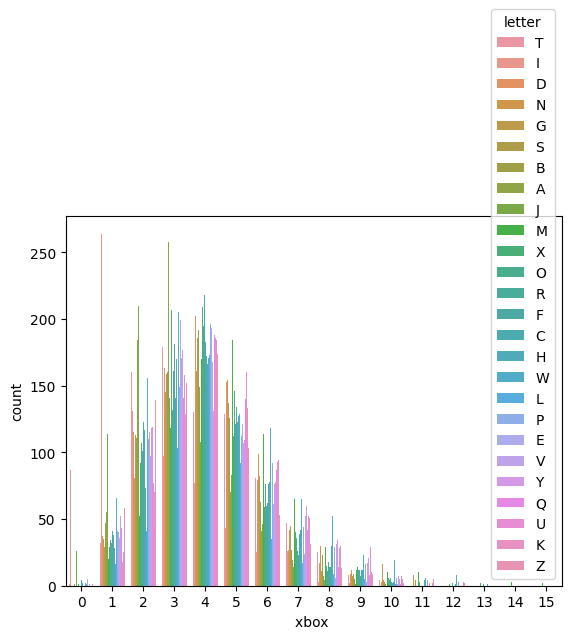

<Figure size 5000x1000 with 0 Axes>

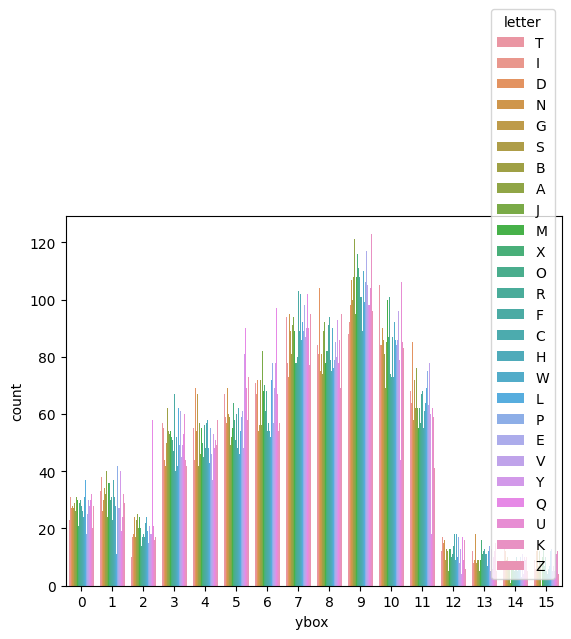

<Figure size 5000x1000 with 0 Axes>

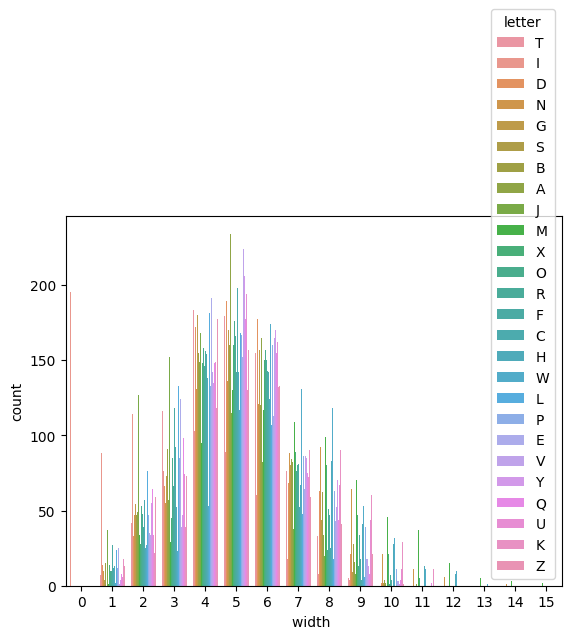

<Figure size 5000x1000 with 0 Axes>

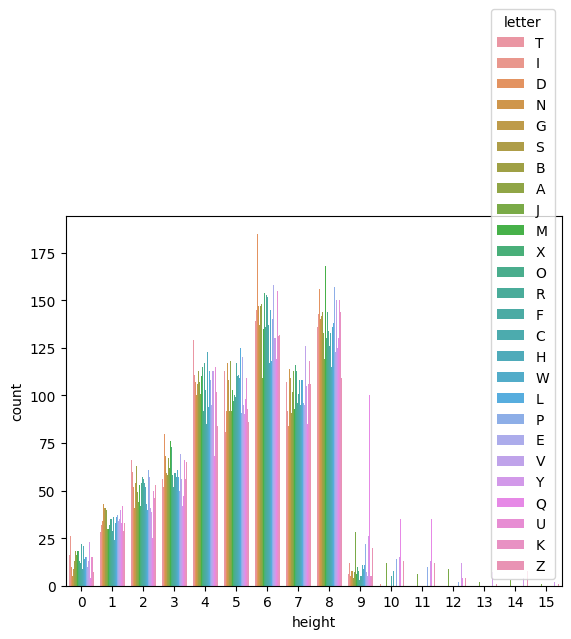

<Figure size 5000x1000 with 0 Axes>

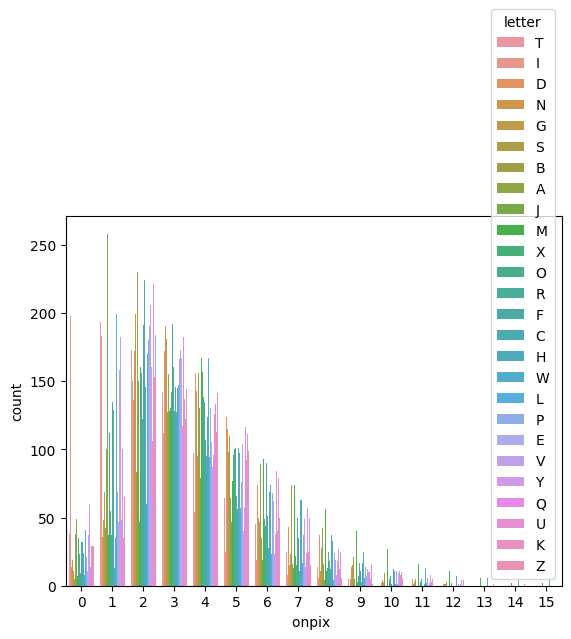

<Figure size 5000x1000 with 0 Axes>

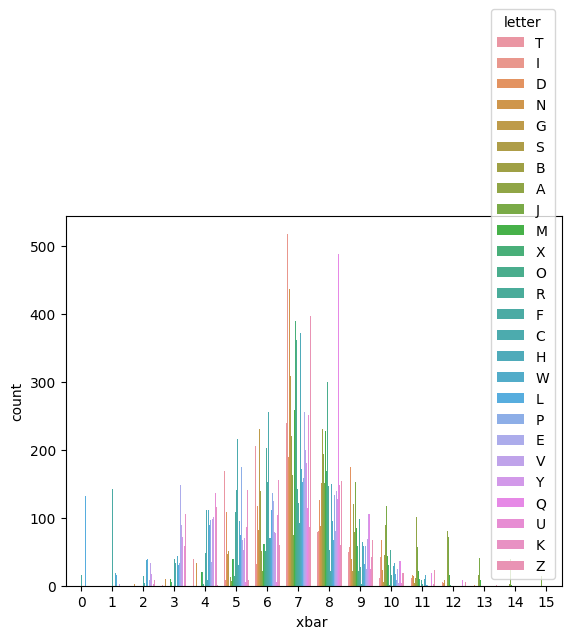

<Figure size 5000x1000 with 0 Axes>

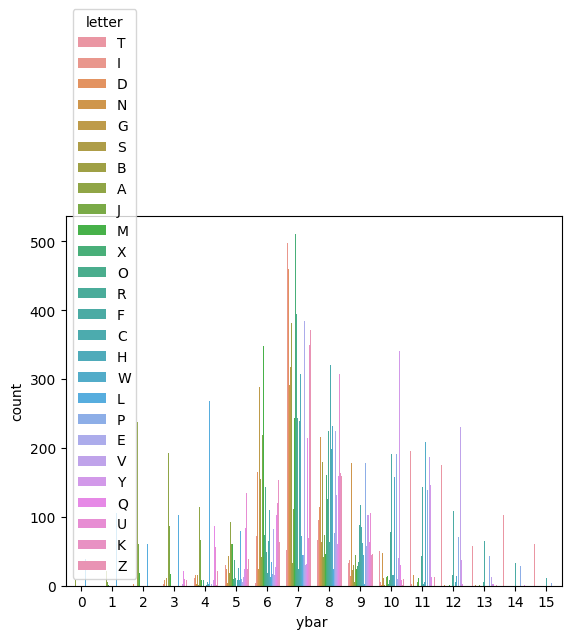

<Figure size 5000x1000 with 0 Axes>

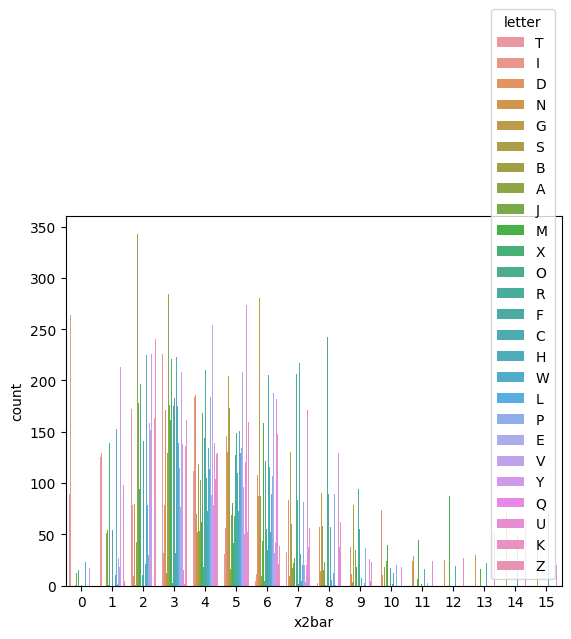

<Figure size 5000x1000 with 0 Axes>

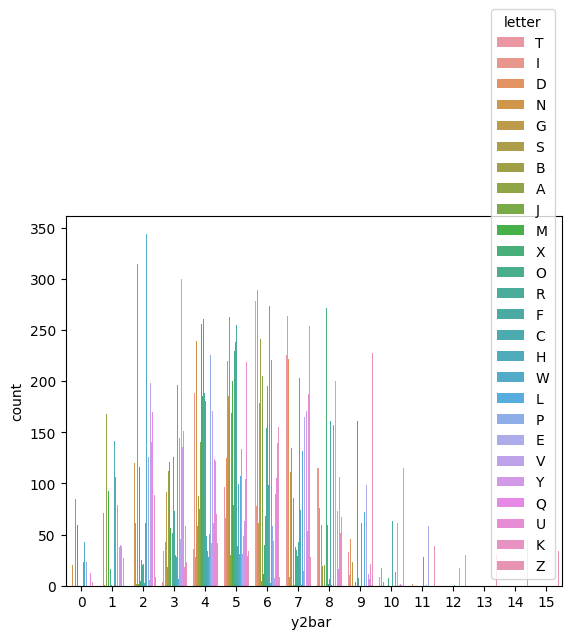

<Figure size 5000x1000 with 0 Axes>

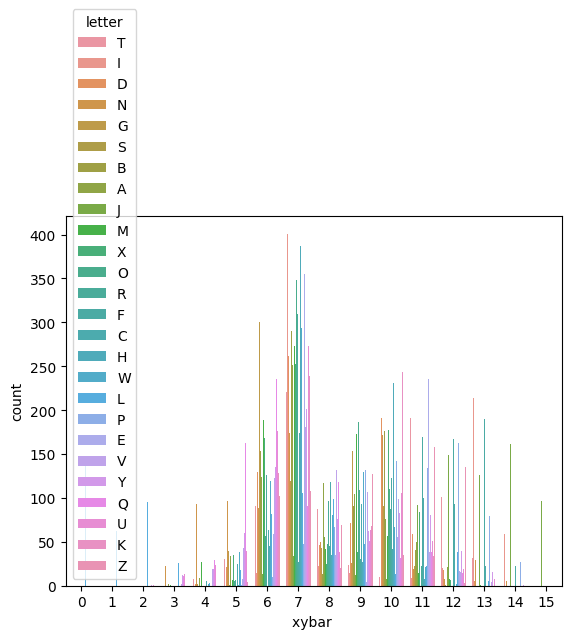

<Figure size 5000x1000 with 0 Axes>

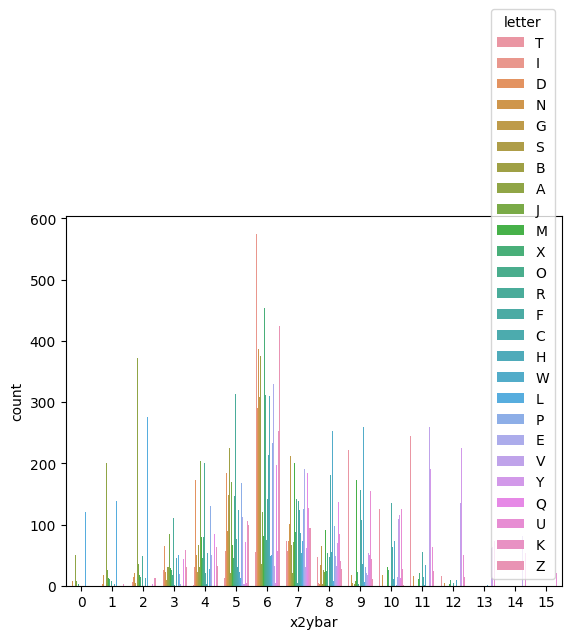

<Figure size 5000x1000 with 0 Axes>

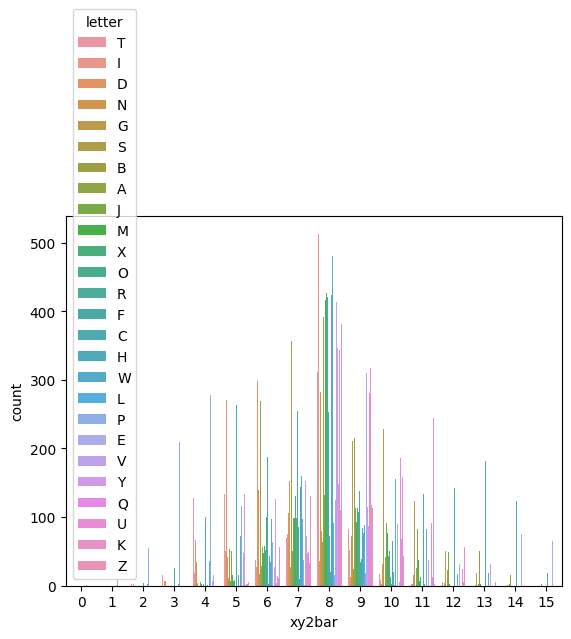

<Figure size 5000x1000 with 0 Axes>

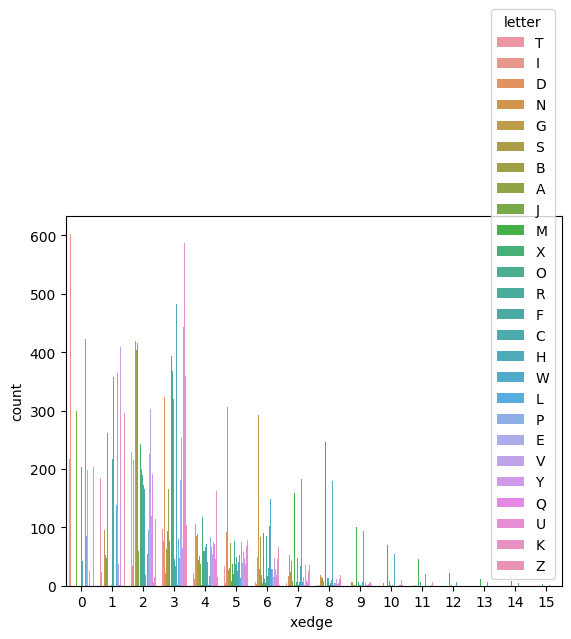

<Figure size 5000x1000 with 0 Axes>

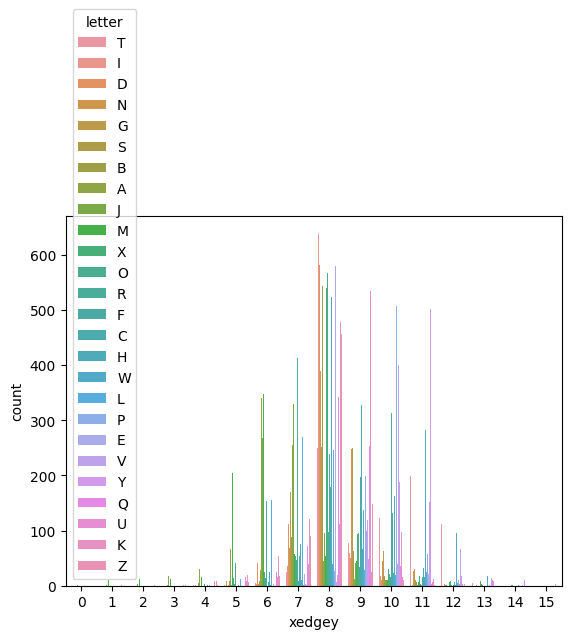

<Figure size 5000x1000 with 0 Axes>

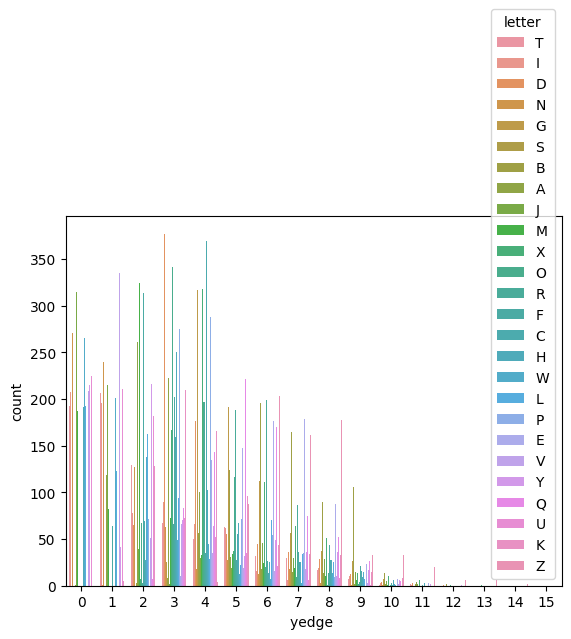

<Figure size 5000x1000 with 0 Axes>

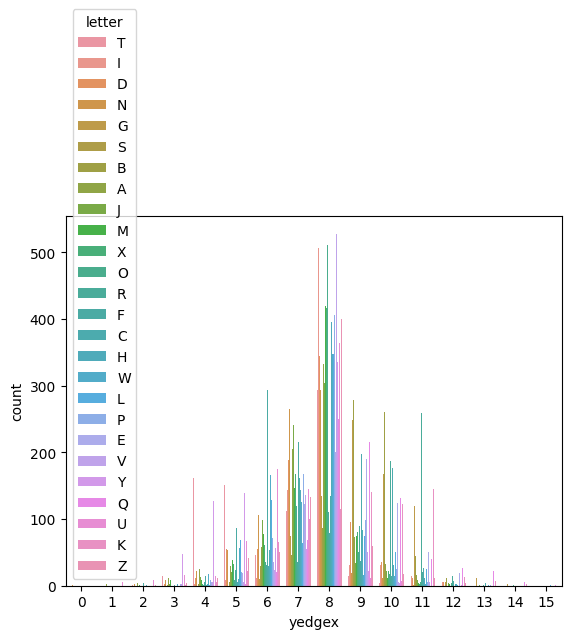

<Figure size 5000x1000 with 0 Axes>

In [8]:
for i in data.columns:
    if i != "letter":
        sns.countplot(x=i, hue="letter", data=data)
        # plt.legend(loc='upper right')
        plt.figure(figsize=(50,10))
        plt.show()

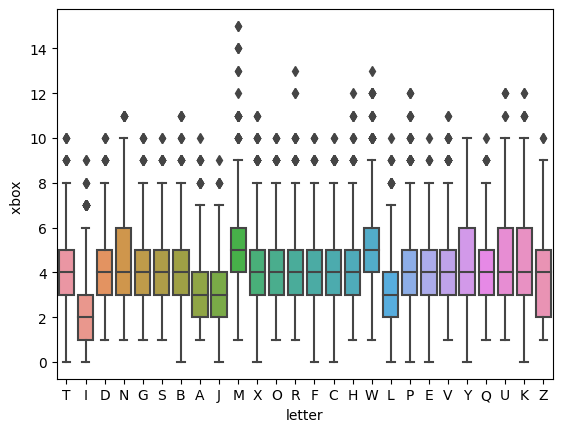

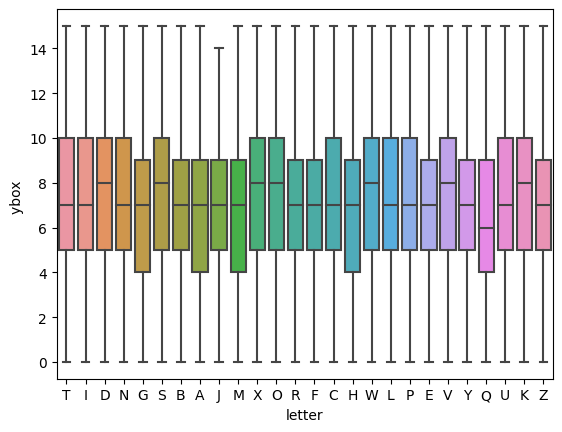

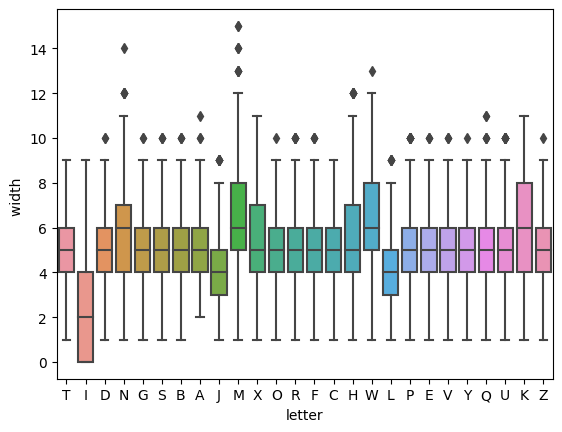

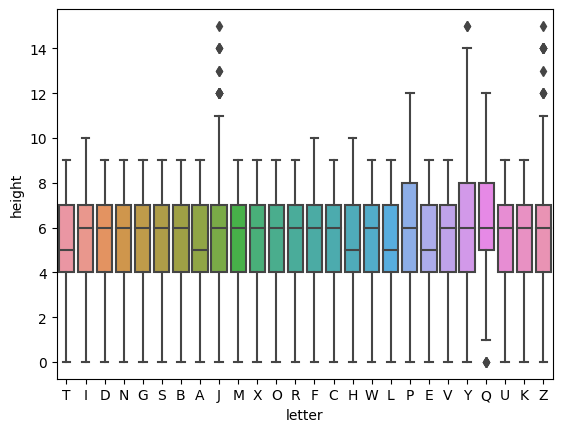

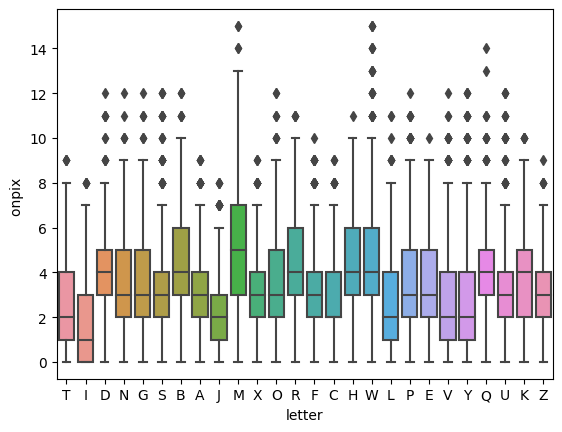

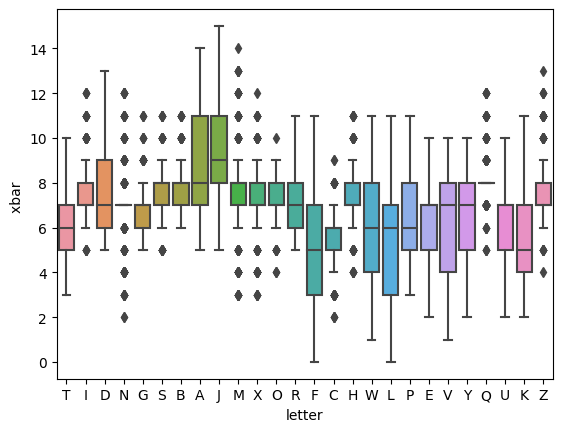

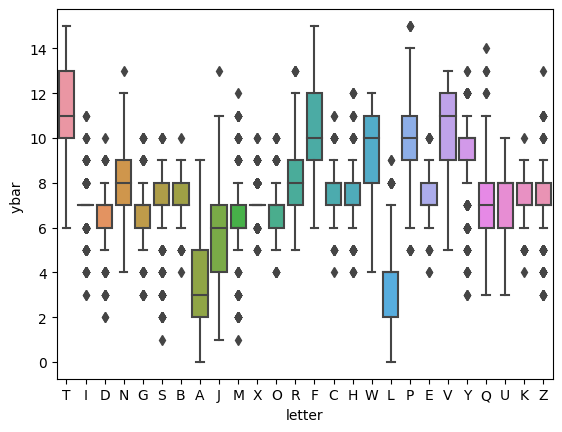

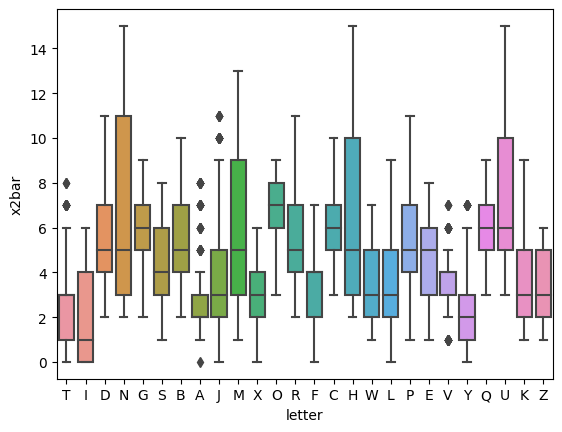

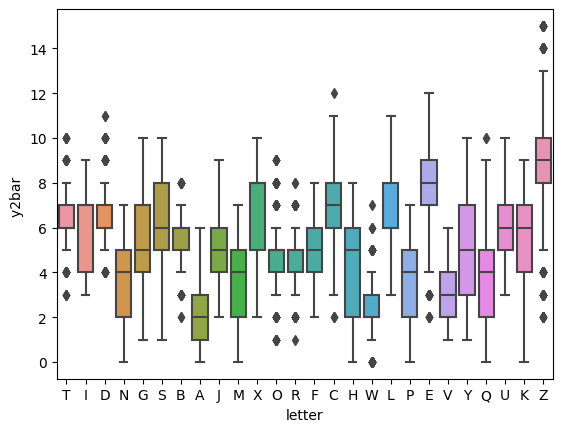

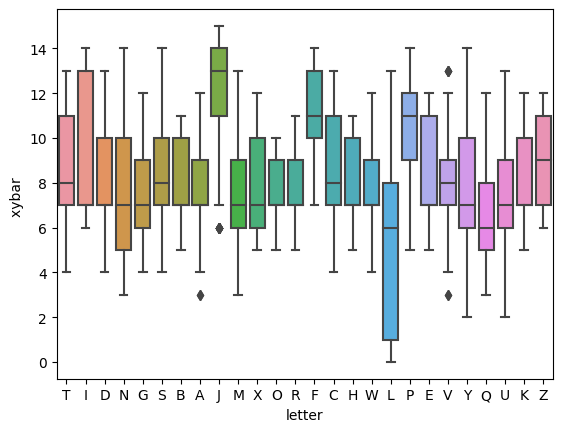

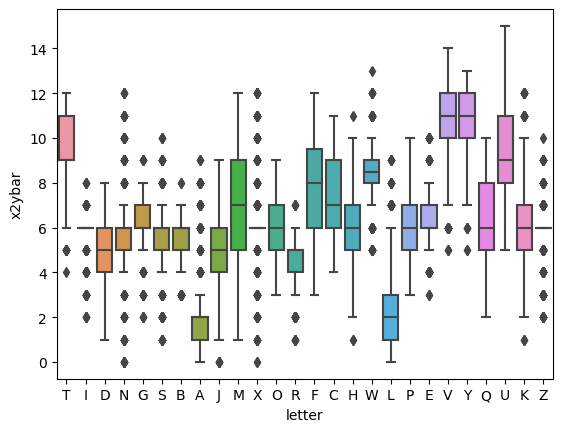

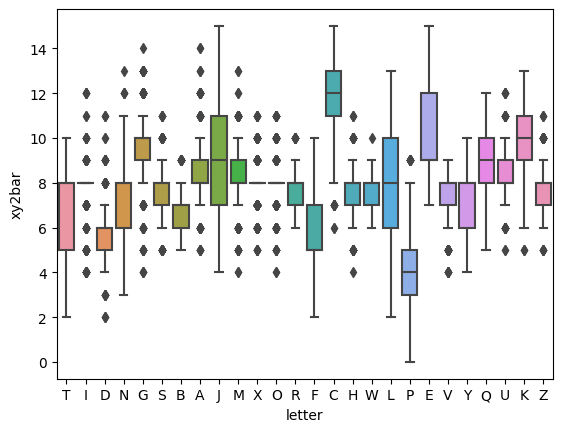

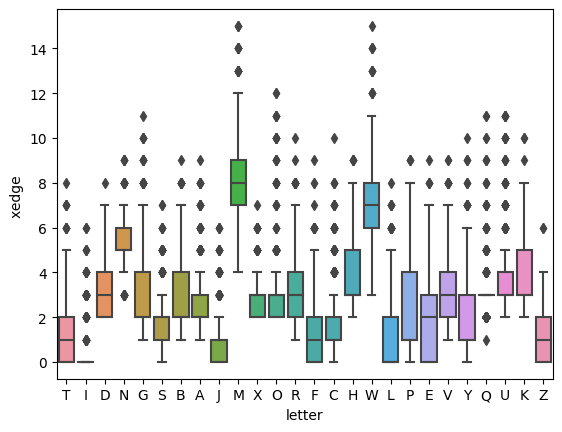

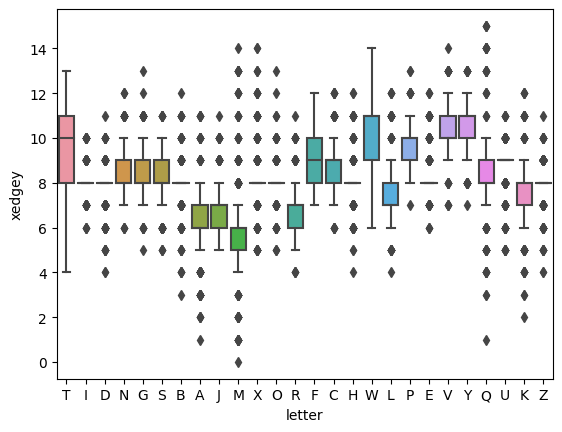

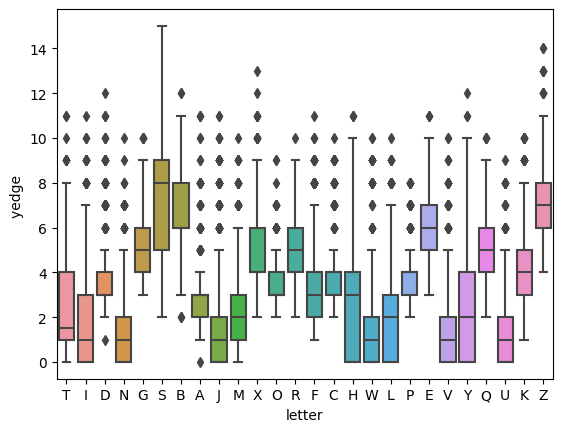

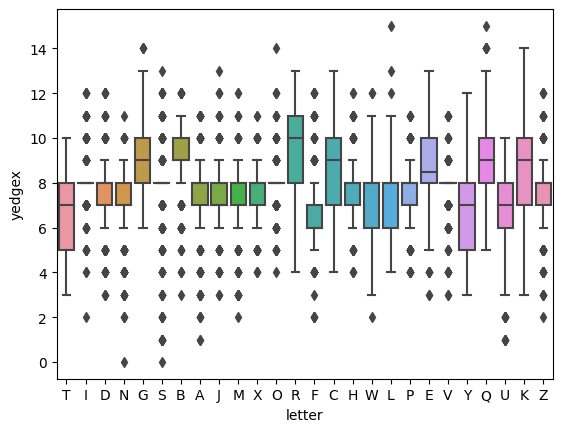

In [9]:
for i in data.columns:
    if i != "letter":
        sns.boxplot(x="letter", y=i, data=data)
        plt.show()
        

In [10]:
data["letter"] = data["letter"].map({"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7, "I": 8, "J": 9, "K": 10, "L": 11, "M": 12, "N": 13, "O": 14, "P": 15, "Q": 16, "R": 17, "S": 18, "T": 19, "U": 20, "V": 21, "W": 22, "X": 23, "Y": 24, "Z": 25})

<Axes: >

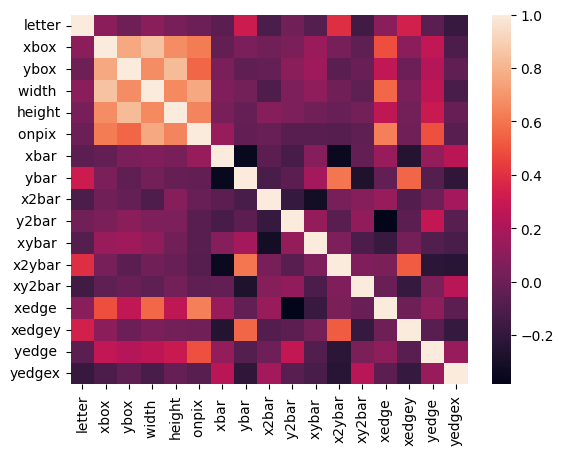

In [11]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


# Training the model

## Creating 10 samples

In [12]:
sample1 = data.sample(n=int(len(data)/10), random_state=123)
sample2 = data.sample(n=int(len(data)/10), random_state=456)
sample3 = data.sample(n=int(len(data)/10), random_state=789)
sample4 = data.sample(n=int(len(data)/10), random_state=112)
sample5 = data.sample(n=int(len(data)/10), random_state=135)
sample6 = data.sample(n=int(len(data)/10), random_state=118)
sample7 = data.sample(n=int(len(data)/10), random_state=121)
sample8 = data.sample(n=int(len(data)/10), random_state=222)
sample9 = data.sample(n=int(len(data)/10), random_state=227)
sample10 = data.sample(n=int(len(data)/10), random_state=280)

## Split the data into train and test

In [13]:
# Split each sample into train and test
for i in range(1, 11):
    globals()["X_train" + str(i)], globals()["X_test" + str(i)], globals()["y_train" + str(i)], globals()["y_test" + str(i)] = train_test_split(globals()["sample" + str(i)].drop("letter", axis=1), globals()["sample" + str(i)]["letter"], test_size=0.3)

### Normailise the data

In [14]:
for i in range(1, 11):
    scaler = StandardScaler()
    scaler.fit(globals()["X_train" + str(i)])
    globals()["X_train" + str(i)] = scaler.transform(globals()["X_train" + str(i)])
    globals()["X_test" + str(i)] = scaler.transform(globals()["X_test" + str(i)])

## Training and finding the best accuracy

In [16]:
bestAccuracy = 0
bestkernel = ""
bestNu = 0 # range(0, 1)
bestEpsilon = 0 # range(0, 1)
iterations = 1000
sample_data = pd.DataFrame(columns=["Sample","Fitness", "Kernel", "Nu", "Epsilon"])
accuracyList = pd.DataFrame(columns=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5", "Sample6", "Sample7", "Sample8", "Sample9", "Sample10"])
acc = []
for i in range(1, 11):
    acc = []
    for itr in range(1,iterations+1):
        kernel = random.choice(["linear", "poly", "rbf", "sigmoid"])
        nu = random.uniform(0.0001, 1)
        epsilon = random.uniform(0, 1)
        model = svm.SVR(kernel=kernel, C=nu, epsilon=epsilon)
        model.fit(globals()["X_train" + str(i)], globals()["y_train" + str(i)])
        y_pred = model.predict(globals()["X_test" + str(i)])
        y_pred = [round(x) for x in y_pred]
        accuracy = sum(y_pred == globals()["y_test" + str(i)]) / len(globals()["y_test" + str(i)])
        acc.append(accuracy)
        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestkernel = kernel
            bestNu = nu
            bestEpsilon = epsilon
    sample_data = sample_data.append({"Sample": i, "Fitness": bestAccuracy, "Kernel": bestkernel, "Nu": bestNu, "Epsilon": bestEpsilon}, ignore_index=True)
    bestAccuracy = 0
    bestkernel = ""
    bestNu = 0
    bestEpsilon = 0
    accuracyList["Sample"+str(i)] = acc

<ipython-input-16-9cb2ea79d1e9>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append({"Sample": i, "Fitness": bestAccuracy, "Kernel": bestkernel, "Nu": bestNu, "Epsilon": bestEpsilon}, ignore_index=True)


Text(0, 0.5, 'Accuracy')

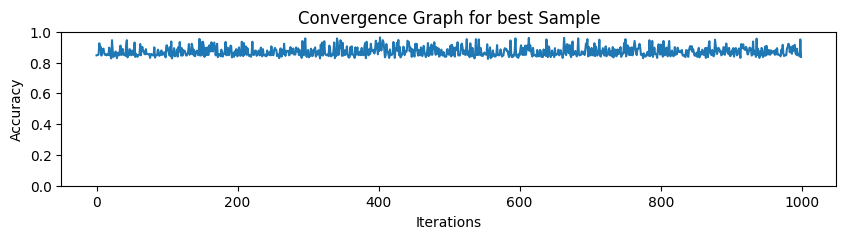

In [62]:
bestSampleNum = int(sample_data["Fitness"].idxmax()) + 1
bestSample = sample_data.loc[bestSampleNum]

# Get all values of bestSample from accuracyList
BestAccuracies = np.array(accuracyList.loc[:, "Sample"+str(bestSampleNum)])

# Plot graph of BestAccuracies for x-axis as iterations and y-axis as accuracy
plt.figure(figsize=(10,2))
plt.ylim(0, 1)
plt.plot(BestAccuracies)
plt.title("Convergence Graph for best Sample")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")